In [101]:
import numpy as np
from scipy.optimize import linprog

A=[[1,2,-1,-1],[-1,-5,2,3]]
b=[[1,1]]
b=np.transpose(b)

c=[[1,1,1,1]]
c=np.transpose(c)

res = linprog(c, A_eq=A, b_eq=b, method="simplex")
print(res)
d=np.reshape(res.x, (4,1))
print(np.shape(d))
print((np.inner(np.transpose(d),np.transpose(c))))

     con: array([0.00000000e+00, 6.66133815e-16])
     fun: 2.9999999999999996
 message: 'Optimization terminated successfully.'
     nit: 2
   slack: array([], dtype=float64)
  status: 0
 success: True
       x: array([2., 0., 0., 1.])


In [108]:
import time
constraints=[2,6,10,14]
variables=[4,10,20,30,40,50]
optimization_time=np.zeros((4,6))
optimization_iteration=np.zeros((4,6))
optimization_result=np.zeros((4,6))
optimization_result1=np.zeros((4,6))
slack_variables=np.zeros((4,6))
for i,m in enumerate(constraints):
    for j,n in enumerate(variables):        
        A=np.random.randint(40, size=(m,n))
        A=A-20
        b=np.random.randint(10, size=(m,1))
        c=np.random.randint(20, size=(n,1))
        start_time=time.time()
        res = linprog(c, A_eq=A, b_eq=b, method="simplex")
        end_time=time.time()
        optimization_time[i][j]=end_time-start_time
        d=np.reshape(res.x, (n,1))
        optimization_result1[i][j]=np.inner(np.transpose(d),np.transpose(c))
        optimization_result[i][j]=res.fun
        optimization_iteration[i][j]=res.nit
        slack_variables[i][j]=len(res.slack)

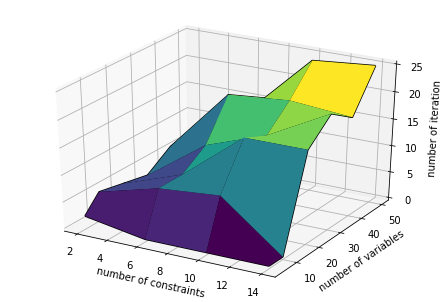

+----+-----+------+------+------+------+------+
|    |   4 |   10 |   20 |   30 |   40 |   50 |
+====+=====+======+======+======+======+======+
|  2 |   2 |    5 |    4 |    3 |    6 |    7 |
+----+-----+------+------+------+------+------+
|  6 |   0 |    8 |    8 |   11 |   18 |   13 |
+----+-----+------+------+------+------+------+
| 10 |   0 |    9 |   17 |   15 |   19 |   24 |
+----+-----+------+------+------+------+------+
| 14 |   0 |    0 |   17 |   21 |   18 |   25 |
+----+-----+------+------+------+------+------+


In [109]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d, Axes3D  
from tabulate import tabulate
fig = plt.figure()
ax = Axes3D(fig)
X, Y = np.meshgrid(constraints, variables)
ax.plot_wireframe(X,Y,np.transpose(optimization_iteration),color='black')
ax.plot_surface(X,Y,np.transpose(optimization_iteration),cmap='viridis')
ax.set_xlabel('number of constraints')
ax.set_ylabel('number of variables')
ax.set_zlabel('number of iteration')
plt.show()

headers=[4,10,20,30,40,50]
table=np.c_[np.transpose([constraints]),optimization_iteration]
print(tabulate(table,headers, tablefmt="grid"))    

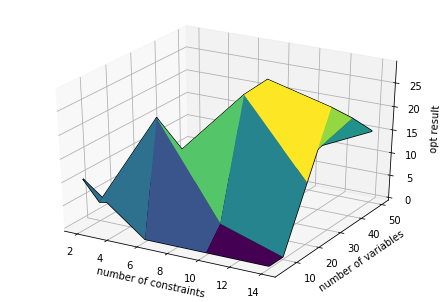

|    |       4 |       10 |        20 |       30 |       40 |        50 |
|----|---------|----------|-----------|----------|----------|-----------|
|  2 | 10.4198 |  3.54167 |  0.394137 |  1.79259 |  0       |  0.105882 |
|  6 |  0      | 24.0794  | 14.6435   |  4.93041 |  3.19496 |  1.86235  |
| 10 |  0      |  4.33957 | 28.4747   | 28.9449  |  5.72457 |  8.75578  |
| 14 |  0      |  0       | 12.8691   | 25.5712  | 20.6176  | 15.137    |


In [110]:
fig = plt.figure()
ax = Axes3D(fig)

X, Y = np.meshgrid(constraints, variables)
ax.plot_wireframe(X,Y,np.transpose(optimization_result),color='black')
cset = ax.plot_surface(X,Y,np.transpose(optimization_result),cmap='viridis')
ax.set_xlabel('number of constraints')
ax.set_ylabel('number of variables')
ax.set_zlabel('opt result')
plt.show()

headers=[4,10,20,30,40,50]
table=np.c_[np.transpose([constraints]),optimization_result]
print(tabulate(table,headers, tablefmt="github"))


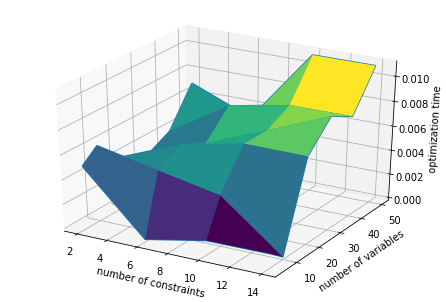

+----+-------------+------------+------------+------------+------------+------------+
|    |           4 |         10 |         20 |         30 |         40 |         50 |
+====+=============+============+============+============+============+============+
|  2 | 0.00499034  | 0.00597835 | 0.00398874 | 0.00299168 | 0.00398922 | 0.00698209 |
+----+-------------+------------+------------+------------+------------+------------+
|  6 | 0           | 0.00498676 | 0.00598407 | 0.00498152 | 0.00698066 | 0.004987   |
+----+-------------+------------+------------+------------+------------+------------+
| 10 | 0.000997066 | 0.00398898 | 0.00698137 | 0.00698137 | 0.00797892 | 0.0109711  |
+----+-------------+------------+------------+------------+------------+------------+
| 14 | 0.00103235  | 0          | 0.00694442 | 0.00901508 | 0.00797844 | 0.0109718  |
+----+-------------+------------+------------+------------+------------+------------+


In [111]:
fig = plt.figure()
ax = Axes3D(fig)
X, Y = np.meshgrid(constraints, variables)
ax.plot_wireframe(X,Y,np.transpose(optimization_time))
ax.plot_surface(X,Y,np.transpose(optimization_time),cmap='viridis') 

ax.set_xlabel('number of constraints')
ax.set_ylabel('number of variables')
ax.set_zlabel('optimization time')

plt.show()

headers=[4,10,20,30,40,50]
table=np.c_[np.transpose([constraints]),optimization_time]
print(tabulate(table,headers, tablefmt="grid"))

<Figure size 432x288 with 0 Axes>

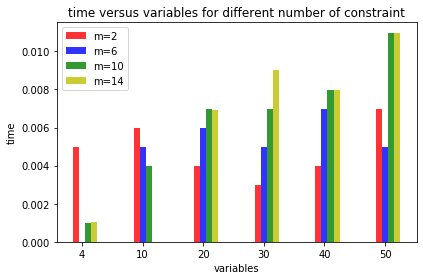

In [171]:
fig=plt.figure()
n_groups = 6
color=['r','b','g','y']

# create plot
fig, ax = plt.subplots()
index = np.arange(n_groups)
bar_width = 0.1
opacity = 0.8
for i,m in enumerate(constraints): 
    ax.bar(index + i*bar_width, optimization_time[i], bar_width,
    alpha=opacity,
    color=color[i],
    label='m='+str(m))
  
plt.xlabel('variables')
plt.ylabel('time')
plt.title('time versus variables for different number of constraint')
plt.xticks(index + bar_width, ('4', '10', '20', '30','40','50'))
plt.legend()

plt.tight_layout()
plt.show()


<Figure size 432x288 with 0 Axes>

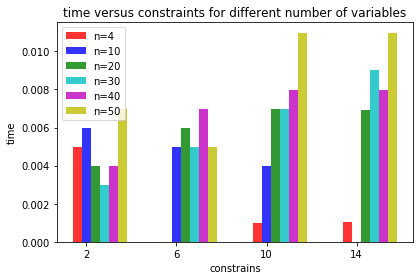

In [179]:
fig=plt.figure()
n_groups = 4
color=['r','b','g','c','m','y']

# create plot
fig, ax = plt.subplots()
index = np.arange(n_groups)
bar_width = 0.1
opacity = 0.8
data=np.transpose(optimization_time)
for i,n in enumerate(variables): 
    ax.bar(index + i*bar_width, data[i], bar_width,
    alpha=opacity,
    color=color[i],
    label='n='+str(n))
  
plt.xlabel('constrains')
plt.ylabel('time')
plt.title('time versus constraints for different number of variables')
plt.xticks(index + bar_width, ('2', '6', '10', '14'))
plt.legend()

plt.tight_layout()
plt.show()
